In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')# uyarıları gizlemek için.

df= pd.read_csv("datasets/weather.csv")
df.head()

,datetime,tempmax,tempmin,temp,feelslikemax,feelslikemin,feelslike,dew,humidity,precip,...,solarenergy,uvindex,severerisk,sunrise,sunset,moonphase,conditions,description,icon,stations
0,2021-01-01,14.2,10.9,12.6,14.2,10.9,12.6,9.0,79.0,2.747,...,5.5,3,NaN,2021-01-01T08:29:19,2021-01-01T17:46:34,0.58,"Rain, Partially cloudy",Partly cloudy throughout the day with rain in ...,rain,"LTBA,17063099999,17119099999,17061099999,17064..."
1,2021-01-02,15.6,6.2,10.8,15.6,4.8,10.6,6.2,74.5,0.000,...,8.8,4,NaN,2021-01-02T08:29:24,2021-01-02T17:47:25,0.61,Clear,Clear conditions throughout the day.,clear-day,"LTBA,17063099999,17119099999,17061099999,17064..."
2,2021-01-03,14.4,6.9,11.0,14.4,6.1,10.9,5.9,71.4,0.000,...,5.9,4,NaN,2021-01-03T08:29:27,2021-01-03T17:48:19,0.65,Partially cloudy,Partly cloudy throughout the day.,partly-cloudy-day,"D8508,LTBA,17063099999,17119099999,17061099999..."
3,2021-01-04,15.8,10.3,13.0,15.8,10.3,13.0,5.2,59.8,0.000,...,7.6,4,NaN,2021-01-04T08:29:27,2021-01-04T17:49:13,0.69,Partially cloudy,Partly cloudy throughout the day.,partly-cloudy-day,"LTBA,17063099999,17119099999,17061099999,17064..."
4,2021-01-05,15.3,10.8,13.5,15.3,10.8,13.5,8.5,72.0,1.202,...,9.1,5,NaN,2021-01-05T08:29:26,2021-01-05T17:50:09,0.72,"Rain, Partially cloudy",Clearing in the afternoon with morning rain.,rain,"LTBA,17063099999,17119099999,17061099999,17064..."


In [2]:
def check_df(dataframe, head=5):
    print("############################## Shape ##############################")
    print(dataframe.shape)
    print("############################## Types ##############################")
    print(dataframe.dtypes)
    print("############################## NA ##############################")
    print(dataframe.isnull().sum())
    print("############################## Quantiles ##############################")
    print(dataframe.describe([0, 0.05, 0.50, 0.95, 0.99, 1]).T)
check_df(df)

############################## Shape ##############################
(2000, 32)
############################## Types ##############################
datetime             object
tempmax             float64
tempmin             float64
temp                float64
feelslikemax        float64
feelslikemin        float64
feelslike           float64
dew                 float64
humidity            float64
precip              float64
precipprob          float64
precipcover         float64
preciptype           object
snow                float64
snowdepth           float64
windgust            float64
windspeed           float64
winddir             float64
sealevelpressure    float64
cloudcover          float64
visibility          float64
solarradiation      float64
solarenergy         float64
uvindex               int64
severerisk          float64
sunrise              object
sunset               object
moonphase           float64
conditions           object
description          object
icon         

In [3]:
df.head()# yukarıda karışık çıktığından ayrı bakıyorum.

,datetime,tempmax,tempmin,temp,feelslikemax,feelslikemin,feelslike,dew,humidity,precip,...,solarenergy,uvindex,severerisk,sunrise,sunset,moonphase,conditions,description,icon,stations
0,2021-01-01,14.2,10.9,12.6,14.2,10.9,12.6,9.0,79.0,2.747,...,5.5,3,NaN,2021-01-01T08:29:19,2021-01-01T17:46:34,0.58,"Rain, Partially cloudy",Partly cloudy throughout the day with rain in ...,rain,"LTBA,17063099999,17119099999,17061099999,17064..."
1,2021-01-02,15.6,6.2,10.8,15.6,4.8,10.6,6.2,74.5,0.000,...,8.8,4,NaN,2021-01-02T08:29:24,2021-01-02T17:47:25,0.61,Clear,Clear conditions throughout the day.,clear-day,"LTBA,17063099999,17119099999,17061099999,17064..."
2,2021-01-03,14.4,6.9,11.0,14.4,6.1,10.9,5.9,71.4,0.000,...,5.9,4,NaN,2021-01-03T08:29:27,2021-01-03T17:48:19,0.65,Partially cloudy,Partly cloudy throughout the day.,partly-cloudy-day,"D8508,LTBA,17063099999,17119099999,17061099999..."
3,2021-01-04,15.8,10.3,13.0,15.8,10.3,13.0,5.2,59.8,0.000,...,7.6,4,NaN,2021-01-04T08:29:27,2021-01-04T17:49:13,0.69,Partially cloudy,Partly cloudy throughout the day.,partly-cloudy-day,"LTBA,17063099999,17119099999,17061099999,17064..."
4,2021-01-05,15.3,10.8,13.5,15.3,10.8,13.5,8.5,72.0,1.202,...,9.1,5,NaN,2021-01-05T08:29:26,2021-01-05T17:50:09,0.72,"Rain, Partially cloudy",Clearing in the afternoon with morning rain.,rain,"LTBA,17063099999,17119099999,17061099999,17064..."


In [4]:
# tarih verileri object tipinde. datetime türüne çevirdim.
df['datetime'] = pd.to_datetime(df['datetime'])
df.info()

df = df[["datetime", "tempmax", "tempmin", "temp"]]# değişkenleri kırptım


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 32 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   datetime          2000 non-null   datetime64[ns]
 1   tempmax           2000 non-null   float64       
 2   tempmin           2000 non-null   float64       
 3   temp              2000 non-null   float64       
 4   feelslikemax      2000 non-null   float64       
 5   feelslikemin      2000 non-null   float64       
 6   feelslike         2000 non-null   float64       
 7   dew               2000 non-null   float64       
 8   humidity          2000 non-null   float64       
 9   precip            2000 non-null   float64       
 10  precipprob        2000 non-null   float64       
 11  precipcover       2000 non-null   float64       
 12  preciptype        997 non-null    object        
 13  snow              2000 non-null   float64       
 14  snowdepth         1999 n

In [5]:
# Gün-Ay değişkeni oluşturma
df['day_month'] = df['datetime'].dt.strftime('%d-%m')

# Yeni tarihleri oluşturma: Son tarihten itibaren 365 gün eklenir
last_date = pd.to_datetime(df['datetime']).max()
new_dates = pd.date_range(start=last_date + pd.Timedelta(days=1), periods=365, freq='D')

In [6]:
# Gün-Ay bazında ortalama sıcaklık hesaplama
grouped_averages = df.groupby("day_month")[['tempmax', 'tempmin', 'temp']].mean()

In [7]:
# Yeni veri seti için boş bir sözlük
new_data = {
    'datetime': [],
    'tempmax': [],
    'tempmin': [],
    'temp': []
}

# Yeni tarihleri oluşturma ve değerlerini doldurma
for date in new_dates:
    day_month = date.strftime('%d-%m')  # Yeni tarihler için Gün-Ay formatı
    avg_tempmax = grouped_averages.loc[day_month, 'tempmax']
    avg_tempmin = grouped_averages.loc[day_month, 'tempmin']
    avg_temp = grouped_averages.loc[day_month, 'temp']

    # Küçük bir rastgele sapma ekleyerek gerçekçiliği artırma!!!!!!
    new_data['datetime'].append(date)
    new_data['tempmax'].append(avg_tempmax + np.random.normal(0, 2))
    new_data['tempmin'].append(avg_tempmin + np.random.normal(0, 2))
    new_data['temp'].append(avg_temp + np.random.normal(0, 2))

# Yeni verileri DataFrame olarak oluştur
new_df = pd.DataFrame(new_data)

# Yeni verilere day_month sütunu ekleme
new_df['day_month'] = new_df['datetime'].dt.strftime('%d-%m')

# Orijinal veri seti ile birleştirme
df_expanded = pd.concat([df, new_df], ignore_index=True)

# Birleştirilen veriyi kaydetme
#df_expanded.to_csv("datasets/weather_expanded2.csv", index=False)


In [8]:
# Tüm verileri tarihe göre sıralama
df_expanded = df_expanded.sort_values(by="datetime").reset_index(drop=True)
df_expanded.head()
df_expanded.tail()


,datetime,tempmax,tempmin,temp,day_month
2360,2024-09-22,20.927604,16.780569,21.356564,22-09
2361,2024-09-23,25.919698,14.719701,20.204640,23-09
2362,2024-09-24,23.155855,15.115974,21.525472,24-09
2363,2024-09-25,23.768547,16.285969,18.040003,25-09
2364,2024-09-26,24.428813,18.704617,18.629851,26-09


In [9]:
df_expanded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2365 entries, 0 to 2364
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   datetime   2365 non-null   datetime64[ns]
 1   tempmax    2365 non-null   float64       
 2   tempmin    2365 non-null   float64       
 3   temp       2365 non-null   float64       
 4   day_month  2365 non-null   object        
dtypes: datetime64[ns](1), float64(3), object(1)
memory usage: 92.5+ KB


In [10]:
df_expanded.tail()

,datetime,tempmax,tempmin,temp,day_month
2360,2024-09-22,20.927604,16.780569,21.356564,22-09
2361,2024-09-23,25.919698,14.719701,20.204640,23-09
2362,2024-09-24,23.155855,15.115974,21.525472,24-09
2363,2024-09-25,23.768547,16.285969,18.040003,25-09
2364,2024-09-26,24.428813,18.704617,18.629851,26-09


In [11]:
def prepare_data(df, sequence_length=7):# Veri hazırlama fonksiyonu
    # Sıcaklık sınıflandırması için eşik değerleri
    def classify_temperature(temp):
        if temp < 10:
            return 0  # soğuk
        elif temp < 20:
            return 1  # orta
        else:
            return 2  # sıcak

    #sıcaklık sınıfları için yeni bir değişken (sütun ekledim)
    df['temp_class'] = df['temp'].apply(classify_temperature)# veri setimdeki sıcaklıkların (temp) sınıflandırmasını yapıyorum.

    # sıcaklık verilerini normalize et
    scaler = MinMaxScaler()
    scaled_temp = scaler.fit_transform(df[['temp']])

    # Sekans verisini hazırla (Son 7 günlük)
    X, y = [], []# X: modelin girişi olacak sekans verilerini saklar. y: hedef etiketleri (sıcak soğuk orta)
    for i in range(len(scaled_temp) - sequence_length):# her iterasyonda sekans uzunluğu kadar ver eklenir
        X.append(scaled_temp[i:(i + sequence_length)])
        y.append(df['temp_class'].iloc[i + sequence_length])

    return np.array(X), np.array(y), scaler

In [12]:
import tensorflow as tf

def create_lstm_model(sequence_length):
    # model = Sequential([# Sequential yapısı ile model katmanlarını sırasıyla eklemiş oluruz
    #     #50 nöronlu,                 giriş boyutu: 7günlük ve 1 özellikli (temp)  ||| her adımda çıktısını sonraki katmana iletir.
    #     LSTM(50, activation='tanh', input_shape=(sequence_length, 1), return_sequences=True),
    #     Dropout(0.2),# Eğitim sırasında nöronların %20sini kapatarak overfittingi engelledim
    #     LSTM(50, activation='tanh'),# sonuçları bir sonraki dense katmanına iletir.
    #     Dropout(0.2),
    #     Dense(32, activation='relu'),#32 nöron LSTMden gelen karmaşık özellikleri sınıflandırma için sadeleştirir.
    #     Dense(3, activation='softmax')  # 3 nöron:  sınıf için (soğuk, orta, sıcak), softmax ile sınıflara ait olma olasılıklarını elde edildi
    # ])
    model = Sequential([
    # Daha derin mimari
    LSTM(128, activation='tanh', input_shape=(sequence_length, 1), return_sequences=True),
    Dropout(0.2),
    LSTM(64, activation='tanh', return_sequences=True),
    Dropout(0.2),
    LSTM(32, activation='tanh'),
    Dropout(0.2),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(3, activation='softmax')# model olasılık çıktısını softmax ile alırız
])

    model.compile(
        optimizer="adam",
        loss='sparse_categorical_crossentropy',
        metrics=['accuracy']
    )
    return model

# optimizer=tf.keras.optimizers.SGD( # daha düşük metrics verdiğinden dolayı adaptive moment (adam ) kullandım
#             learning_rate=0.01,
#             momentum=0.9,
#             nesterov=True
#         ),

In [13]:

# Veriyi hazırla
sequence_length = 7  # Son 7 günün verisini kullanarak tahmin yap
X, y, scaler = prepare_data(df_expanded, sequence_length)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Modeli oluştur ve eğit
model = create_lstm_model(sequence_length)
history = model.fit(X_train, y_train,
                   epochs=50,# model train setini 50 kez işler.
                   batch_size=32,# her seferde 32 örnek işler
                   validation_split=0.2,# doğrulama için %20lik veri ayırır.
                   verbose=1)#eğitim detayını terminalde görüntülemk için

# Model değerlendirme
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test accuracy: {accuracy:.4f}")
print(f"loss: {loss:.4f}")


Epoch 1/50
48/48 [==============================] - 7s 34ms/step - loss: 0.8935 - accuracy: 0.5053 - val_loss: 0.7457 - val_accuracy: 0.7354
Epoch 2/50
48/48 [==============================] - 1s 12ms/step - loss: 0.5534 - accuracy: 0.7533 - val_loss: 0.5243 - val_accuracy: 0.7540
Epoch 3/50
48/48 [==============================] - 1s 13ms/step - loss: 0.4897 - accuracy: 0.7779 - val_loss: 0.5046 - val_accuracy: 0.7751
Epoch 4/50
48/48 [==============================] - 1s 12ms/step - loss: 0.4736 - accuracy: 0.7825 - val_loss: 0.5006 - val_accuracy: 0.7751
Epoch 5/50
48/48 [==============================] - 1s 13ms/step - loss: 0.4721 - accuracy: 0.7805 - val_loss: 0.5007 - val_accuracy: 0.7513
Epoch 6/50
48/48 [==============================] - 1s 12ms/step - loss: 0.4653 - accuracy: 0.7798 - val_loss: 0.5105 - val_accuracy: 0.7593
Epoch 7/50
48/48 [==============================] - 1s 13ms/step - loss: 0.4653 - accuracy: 0.7858 - val_loss: 0.4679 - val_accuracy: 0.7725
Epoch 8/50
48

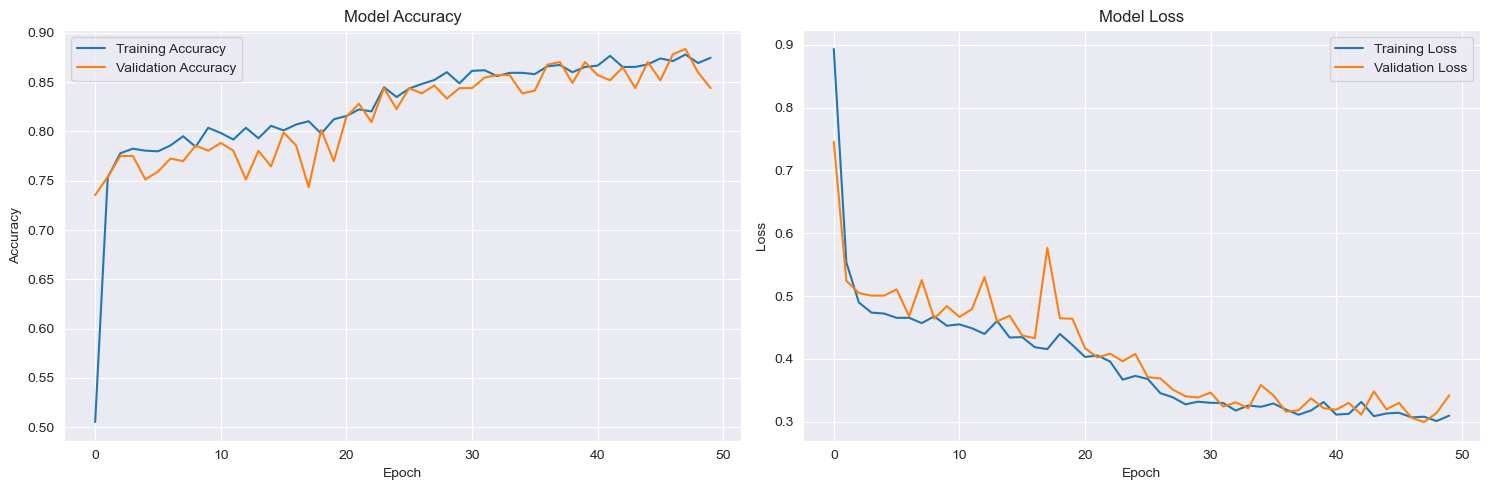

15/15 [==============================] - 1s 4ms/step


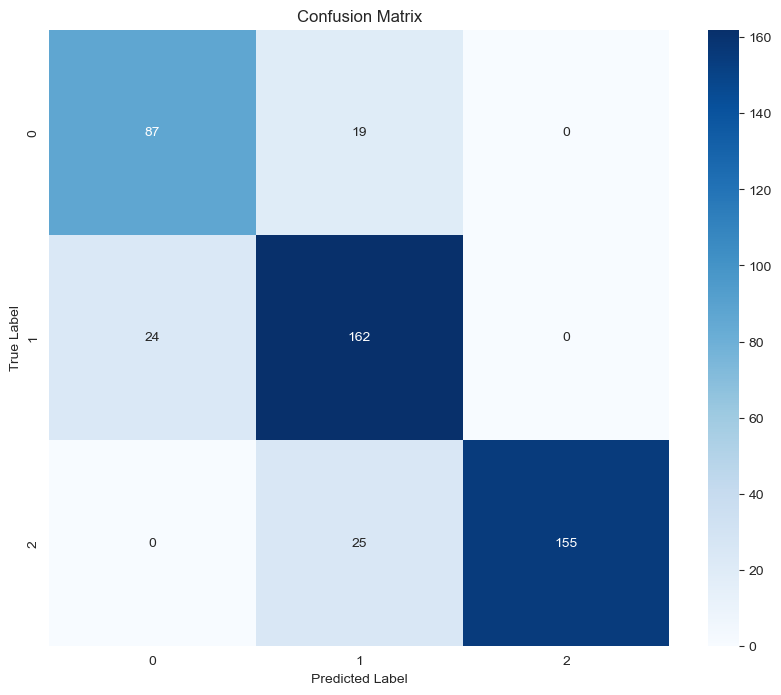


Classification Report:
              precision    recall  f1-score   support

       Soğuk       0.78      0.82      0.80       106
        Orta       0.79      0.87      0.83       186
       Sıcak       1.00      0.86      0.93       180

    accuracy                           0.86       472
   macro avg       0.86      0.85      0.85       472
weighted avg       0.87      0.86      0.86       472



In [14]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report

# Eğitim geçmişini görselleştirme
def plot_training_history(history):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

    # Accuracy plot
    ax1.plot(history.history['accuracy'], label='Training Accuracy')
    ax1.plot(history.history['val_accuracy'], label='Validation Accuracy')
    ax1.set_title('Model Accuracy')
    ax1.set_xlabel('Epoch')
    ax1.set_ylabel('Accuracy')
    ax1.legend()
    ax1.grid(True)

    # Loss plot
    ax2.plot(history.history['loss'], label='Training Loss')
    ax2.plot(history.history['val_loss'], label='Validation Loss')
    ax2.set_title('Model Loss')
    ax2.set_xlabel('Epoch')
    ax2.set_ylabel('Loss')
    ax2.legend()
    ax2.grid(True)

    plt.tight_layout()
    plt.show()

# Confusion Matrix görselleştirme
def plot_confusion_matrix(y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(10, 8))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title('Confusion Matrix')
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.show()

    # Sınıflandırma raporu
    print("\nClassification Report:")
    print(classification_report(y_true, y_pred,
                              target_names=['Soğuk', 'Orta', 'Sıcak']))


plot_training_history(history)

# Test seti tahminleri
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
plot_confusion_matrix(y_test, y_pred_classes)

In [15]:
# Tahmin fonksiyonu
def predict_temperature(model, last_sequence, scaler):
    # Veriyi ölçeklendir ve yeniden şekillendir
    scaled_sequence = scaler.transform(last_sequence)# girdiğim sekans verilerini scale ettim
    scaled_sequence = scaled_sequence.reshape(1, sequence_length, 1)# reshape ile sekans verisini modele uygun hale getirdim. (1örnek, 7 sekans, 1 özellik)

    # Tahmin yap
    prediction = model.predict(scaled_sequence)
    predicted_class = np.argmax(prediction[0])

    # Sınıf etiketlerini döndür
    class_labels = {0: "soğuk", 1: "orta", 2: "sıcak"}
    return class_labels[predicted_class]

In [16]:
# Örnek son sekans (örneğin, son 7 günün sıcaklık değerleri)
last_sequence = [[8], [9], [11.8], [11.0], [12.1], [14.8], [12.7]]

# Tahmin et
predicted_class = predict_temperature(model, last_sequence, scaler)
print(f"Tahmin edilen sıcaklık sınıfı: {predicted_class}")


1/1 [==============================] - 0s 20ms/step
Tahmin edilen sıcaklık sınıfı: orta


In [17]:
def predict_for_future_date(target_date, model, df, scaler, sequence_length=7):
    """
    Herhangi bir gelecek tarih için sıcaklık tahmini yapar

    Args:
        target_date: String ("YYYY-MM-DD" formatında) veya datetime objesi
        model: Eğitilmiş LSTM model
        df: Orijinal veri seti
        scaler: Eğitilmiş MinMaxScaler
        sequence_length: Tahmin için kullanılacak gün sayısı
    """

    # tahmin edilecek tarihi konsolda str olarak girdiğimden datetime e çevirdim.
    if isinstance(target_date, str):
        target_date = pd.to_datetime(target_date)

    # Hedef tarihin gün ve ayını al
    target_day_month = target_date.strftime('%d-%m')

    # Veri setindeki aynı gün-ay kombinasyonlarını bul (farklı yıllardan)
    similar_dates = df[df['day_month'] == target_day_month]

        # Son 7 günlük sekans için benzer günlerin ortalama sıcaklıklarını kullan
    sequence_data = [] #Tahmin için kullanılacak sıcaklık verilerini saklamak için

    for i in range(sequence_length):#hedef tarihten itibaren geriye doğru sequence_length kadar gün oluşturur.
        current_date = target_date - pd.Timedelta(days=i+1)
        current_day_month = current_date.strftime('%d-%m')# Her bir gün için, gün ve ay bilgisi

        # O gün için veri setindeki benzer günlerin ortalama sıcaklığını al
        similar_day_temps = df[df['day_month'] == current_day_month]['temp'].values#current_day_month ile eşleşen satırların sıcaklık değerleri bulunur.
        if len(similar_day_temps) > 0:
            avg_temp = np.mean(similar_day_temps)
        else:
            # Eğer benzer gün bulunamazsa, yıllık ortalamayı kullan
            avg_temp = df['temp'].mean()

        sequence_data.append([avg_temp])

    # Listeyi ters çevir (kronolojik sıra için)
    sequence_data.reverse()

    # Tahmin yap
    sequence_data = np.array(sequence_data)
    scaled_sequence = scaler.transform(sequence_data)
    scaled_sequence = scaled_sequence.reshape(1, sequence_length, 1)

    prediction = model.predict(scaled_sequence, verbose=0)
    predicted_class = np.argmax(prediction[0])#En yüksek olasılığa sahip sınıfın indeksi bulunur

    # Sınıf etiketlerini tanımla
    class_labels = {0: "soğuk", 1: "orta", 2: "sıcak"}
    temperature_class = class_labels[predicted_class]

    # Tahmini sıcaklık değerini hesapla
    class_temp_ranges = {
        "soğuk": "< 10°C",
        "orta": "10-20°C",
        "sıcak": "> 20°C"
    }

    # Sonuçları yazdır
    print(f"\nTarih: {target_date.date()}")
    print(f"Tahmin edilen sıcaklık sınıfı: {temperature_class}")
    print(f"Tahmini sıcaklık aralığı: {class_temp_ranges[temperature_class]}")
    print(f"Tahmin güvenilirliği: %{prediction[0][predicted_class]*100:.2f}")

    # Ek bilgi olarak, mevcut datasetimdeki sıcaklıkları ve sınıfını gösterdim
    similar_temps = similar_dates['temp'].values
    if len(similar_temps) > 0:
        print(f"\nEk Bilgi:")
        print(f"Geçmiş yıllarda aynı günün ortalama sıcaklığı: {np.mean(similar_temps):.1f}°C")
        print(f"Geçmiş yıllarda aynı gün için min-max:"
              f" {np.min(similar_temps):.1f}°C - {np.max(similar_temps):.1f}°C")


In [18]:

# Örnek kullanım:
tahmin_tarihi = "2024-06-08"  # Tahmini istenilen tarih
predict_for_future_date(tahmin_tarihi, model, df_expanded, scaler)


Tarih: 2024-06-08
Tahmin edilen sıcaklık sınıfı: sıcak
Tahmini sıcaklık aralığı: > 20°C
Tahmin güvenilirliği: %59.14

Ek Bilgi:
Geçmiş yıllarda aynı günün ortalama sıcaklığı: 22.3°C
Geçmiş yıllarda aynı gün için min-max: 20.0°C - 24.9°C
